# Full EDA of non-temporal data

In [122]:
import pandas as pd
import sklearn as sk
from pandas_profiling import ProfileReport

### Merging non-time-series data into one frame

In [133]:
income = pd.read_csv("data/country_income_labels.csv")
income = income[['Country Code', 'TableName', 'IncomeGroup']]
income.head()

,Country Code,TableName,IncomeGroup
0,ABW,Aruba,High income
1,AFG,Afghanistan,Low income
2,AGO,Angola,Lower middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income


In [134]:
density = pd.read_csv("data/API_EN.POP.DNST.csv")
density = density[['Country Code', '2018']]
density.columns = ['Country Code', 'Density_2018']
density.head()

,Country Code,Density_2018
0,ABW,588.027778
1,AFG,56.937760
2,AGO,24.713052
3,ALB,104.612263
4,AND,163.842553


In [135]:
cases = pd.read_csv("data/cases_country.csv")
cases = cases[['ISO3','Confirmed', 'Deaths', 'Mortality_Rate']]
cases.columns = ['Country Code', 'Confirmed Cases', 'Deaths', 'Mortality Rate']
cases.head()

,Country Code,Confirmed Cases,Deaths,Mortality Rate
0,AFG,39192.0,1453.0,3.707389
1,ALB,13153.0,375.0,2.851061
2,DZA,50914.0,1711.0,3.360569
3,AND,1836.0,53.0,2.886710
4,AGO,4672.0,171.0,3.660103


In [136]:
population = pd.read_csv("data/Population_country.csv")
population = population[['Country Code', '2019']]
population.columns = ['Country Code', 'Population_2019']
population.head()

,Country Code,Population_2019
0,ABW,106314.0
1,AFG,38041754.0
2,AGO,31825295.0
3,ALB,2854191.0
4,AND,77142.0


In [137]:
gdp = pd.read_csv("data/API_NY.GDP.MKTP.CD.csv")
gdp = gdp[['Country Code', '2019']]
gdp.columns = ['Country Code', 'GDP_2019']
gdp.head()

,Country Code,GDP_2019
0,ABW,NaN
1,AFG,1.910135e+10
2,AGO,9.463542e+10
3,ALB,1.527808e+10
4,AND,3.154058e+09


In [138]:
gdp_per_capita = pd.read_csv("data/API_NY.GDP.PCAP.PP.CD.csv")
gdp_per_capita = gdp_per_capita[['Country Code', '2019']]
gdp_per_capita.columns = ['Country Code', 'GDP_per_cap_2019']
gdp_per_capita.head()

,Country Code,GDP_per_cap_2019
0,ABW,NaN
1,AFG,2293.551684
2,AGO,6929.678158
3,ALB,14495.078514
4,AND,NaN


In [139]:
#leaders = pd.read_csv("data/leaders.csv")
#leaders = leaders[['Country Code', 'Main Leader Gender', 'Any Leader Gender']]
#leaders.head()

In [140]:
temperature = pd.read_csv("data/temperature.csv")
temperature = temperature.drop('Country Name', 1)
temperature.head()

,Country Code,Avg Temp
0,ABW,NaN
1,AFG,12.60
2,AGO,21.55
3,ALB,11.40
4,AND,7.60


In [151]:
dataset = pd.merge(income, density, on='Country Code')
dataset = pd.merge(dataset, cases, on='Country Code')
dataset = pd.merge(dataset, population, on='Country Code')
dataset = pd.merge(dataset, gdp, on='Country Code')
dataset = pd.merge(dataset, gdp_per_capita, on='Country Code')
#dataset = pd.merge(dataset, leaders, on='Country Code')
dataset = pd.merge(dataset, temperature, on='Country Code')
dataset.head()

,Country Code,TableName,IncomeGroup,Density_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Avg Temp
0,AFG,Afghanistan,Low income,56.937760,39192.0,1453.0,3.707389,38041754.0,1.910135e+10,2293.551684,12.60
1,AGO,Angola,Lower middle income,24.713052,4672.0,171.0,3.660103,31825295.0,9.463542e+10,6929.678158,21.55
2,ALB,Albania,Upper middle income,104.612263,13153.0,375.0,2.851061,2854191.0,1.527808e+10,14495.078514,11.40
3,AND,Andorra,High income,163.842553,1836.0,53.0,2.886710,77142.0,3.154058e+09,NaN,7.60
4,ARE,United Arab Emirates,High income,135.609110,90618.0,411.0,0.453552,9770529.0,4.211423e+11,69900.877848,27.00


In [152]:
dataset.columns = ['Country Code', 'Country name', 'Income group', 'Density', 
                   'Confirmed cases', 'Deaths', 'Mortality rate', 'Population', 'GDP', 'GDP per cap', 'Temperature']
dataset.drop('Country Code', 1, inplace=True)
dataset.head()

,Country name,Income group,Density,Confirmed cases,Deaths,Mortality rate,Population,GDP,GDP per cap,Temperature
0,Afghanistan,Low income,56.937760,39192.0,1453.0,3.707389,38041754.0,1.910135e+10,2293.551684,12.60
1,Angola,Lower middle income,24.713052,4672.0,171.0,3.660103,31825295.0,9.463542e+10,6929.678158,21.55
2,Albania,Upper middle income,104.612263,13153.0,375.0,2.851061,2854191.0,1.527808e+10,14495.078514,11.40
3,Andorra,High income,163.842553,1836.0,53.0,2.886710,77142.0,3.154058e+09,NaN,7.60
4,United Arab Emirates,High income,135.609110,90618.0,411.0,0.453552,9770529.0,4.211423e+11,69900.877848,27.00


In [155]:
norm_cases, norm_deaths = [], []
for index, row in dataset.iterrows():
    population, cases, deaths = row['Population'], row['Confirmed cases'], row['Deaths']
    norm_cases.append(cases/population)
    norm_deaths.append(deaths/population)
    
dataset['Normalized cases'] = norm_cases
dataset['Normalized deaths'] = norm_deaths

dataset = dataset[['Country name', 'Confirmed cases', 'Deaths', 'Mortality rate', 'Normalized cases',
                   'Normalized deaths', 'Population', 'Density', 'Income group', 'GDP', 'GDP per cap', 'Temperature']]
dataset.head()

,Country name,Confirmed cases,Deaths,Mortality rate,Normalized cases,Normalized deaths,Population,Density,Income group,GDP,GDP per cap,Temperature
0,Afghanistan,39192.0,1453.0,3.707389,0.001030,0.000038,38041754.0,56.937760,Low income,1.910135e+10,2293.551684,12.60
1,Angola,4672.0,171.0,3.660103,0.000147,0.000005,31825295.0,24.713052,Lower middle income,9.463542e+10,6929.678158,21.55
2,Albania,13153.0,375.0,2.851061,0.004608,0.000131,2854191.0,104.612263,Upper middle income,1.527808e+10,14495.078514,11.40
3,Andorra,1836.0,53.0,2.886710,0.023800,0.000687,77142.0,163.842553,High income,3.154058e+09,NaN,7.60
4,United Arab Emirates,90618.0,411.0,0.453552,0.009275,0.000042,9770529.0,135.609110,High income,4.211423e+11,69900.877848,27.00


In [115]:
#dataset.to_csv ('data/unified-data-per-country.csv', index = False, header=True)

### Generating auto-EDA

In [156]:
#pandas_report = ProfileReport(dataset)
#pandas_report.to_file(output_file='my EDA/pandas_report.html')

In [157]:
import seaborn as sn
import matplotlib.pyplot as plt

                   Mortality rate  Normalized cases  Normalized deaths  \
Mortality rate           1.000000         -0.027489           0.369425   
Normalized cases        -0.027489          1.000000           0.609721   
Normalized deaths        0.369425          0.609721           1.000000   
Population               0.077915         -0.032193           0.006680   
Density                 -0.107120          0.155316          -0.045831   
GDP                      0.177466          0.122308           0.216708   
GDP per cap              0.085294          0.405387           0.267957   
Temperature             -0.057566         -0.085041          -0.252117   

                   Population   Density       GDP  GDP per cap  Temperature  
Mortality rate       0.077915 -0.107120  0.177466     0.085294    -0.057566  
Normalized cases    -0.032193  0.155316  0.122308     0.405387    -0.085041  
Normalized deaths    0.006680 -0.045831  0.216708     0.267957    -0.252117  
Population           

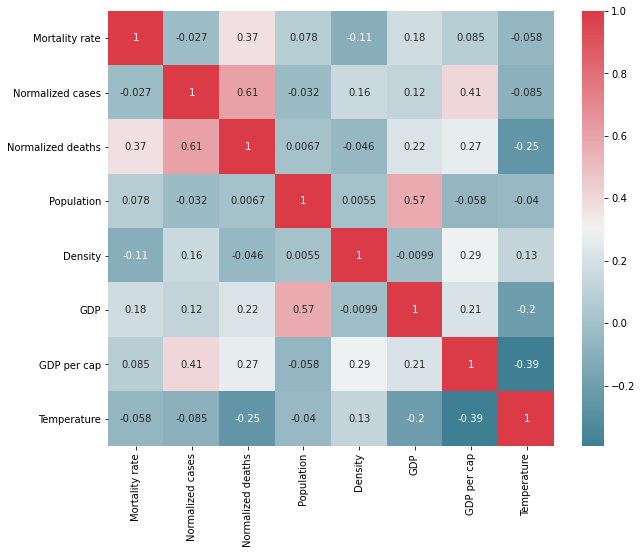

In [179]:
corrMatrix = dataset.corr(method='pearson')
print(corrMatrix)
plt.figure(figsize=(10, 8))
sn.heatmap(corrMatrix, annot=True, cmap=sn.diverging_palette(220, 10, as_cmap=True))
plt.show()

                   Mortality rate  Normalized cases  Normalized deaths  \
Mortality rate           1.000000          0.080686           0.449389   
Normalized cases         0.080686          1.000000           0.897711   
Normalized deaths        0.449389          0.897711           1.000000   
Population               0.349729         -0.120465           0.040160   
Density                 -0.139796          0.018409          -0.049789   
GDP                      0.293163          0.312314           0.387057   
GDP per cap              0.032023          0.540190           0.468235   
Temperature             -0.162847         -0.299119          -0.362517   

                   Population   Density       GDP  GDP per cap  Temperature  
Mortality rate       0.349729 -0.139796  0.293163     0.032023    -0.162847  
Normalized cases    -0.120465  0.018409  0.312314     0.540190    -0.299119  
Normalized deaths    0.040160 -0.049789  0.387057     0.468235    -0.362517  
Population           

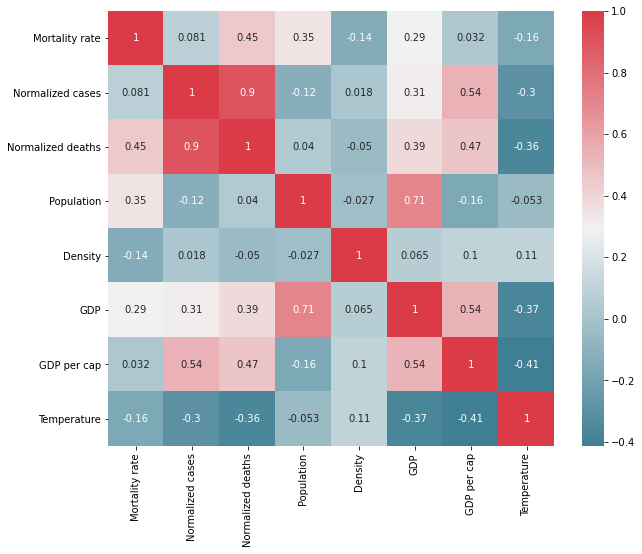

In [177]:
dataset.drop('Confirmed cases', 1, inplace=True)
dataset.drop('Deaths', 1, inplace=True)


corrMatrix = dataset.corr(method='spearman')
print(corrMatrix)
plt.figure(figsize=(10, 8))
sn.heatmap(corrMatrix, annot=True, cmap=sn.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Removing outliers and re-generating the EDA report

In [185]:
print(dataset.shape)
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

dataset = remove_outlier(dataset, 'Density')
#dataset = remove_outlier(dataset, 'GDP_2019')


print(dataset.shape)
dataset.head()

(164, 10)
(148, 10)


,Country name,Mortality rate,Normalized cases,Normalized deaths,Population,Density,Income group,GDP,GDP per cap,Temperature
0,Afghanistan,3.707389,0.001030,0.000038,38041754.0,56.937760,Low income,1.910135e+10,2293.551684,12.60
1,Angola,3.660103,0.000147,0.000005,31825295.0,24.713052,Lower middle income,9.463542e+10,6929.678158,21.55
2,Albania,2.851061,0.004608,0.000131,2854191.0,104.612263,Upper middle income,1.527808e+10,14495.078514,11.40
4,United Arab Emirates,0.453552,0.009275,0.000042,9770529.0,135.609110,High income,4.211423e+11,69900.877848,27.00
7,Antigua and Barbuda,3.061224,0.001009,0.000031,97118.0,218.831818,High income,1.727759e+09,22816.452202,26.00


In [186]:
pandas_report = ProfileReport(dataset)
pandas_report.to_file(output_file='my EDA/pandas_report_outliers_reduced_density_cases.html')

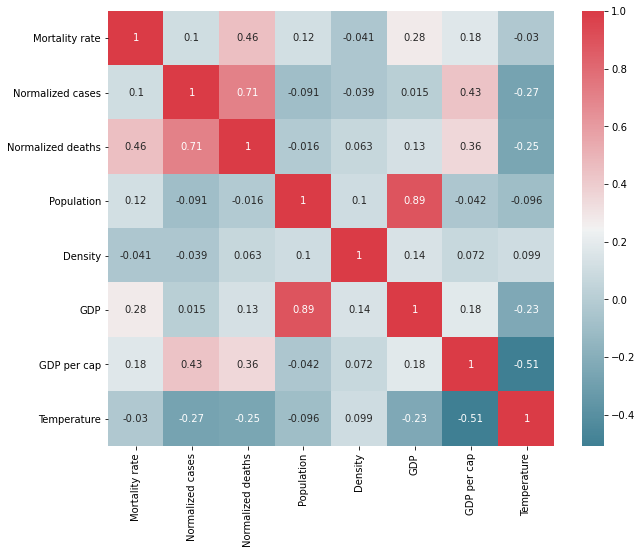

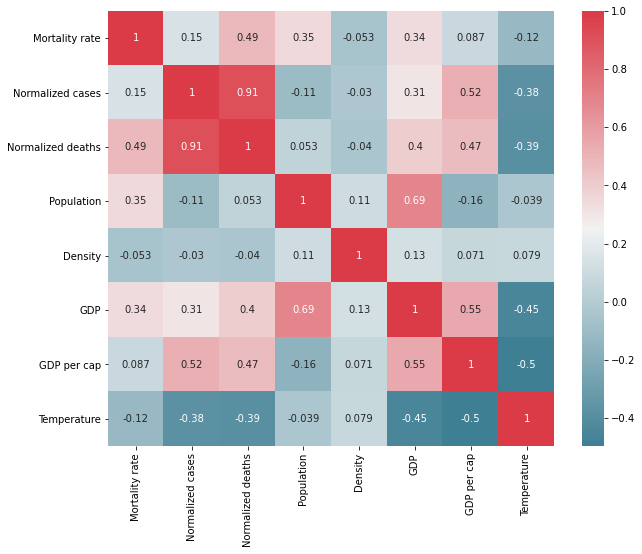

In [187]:
corrMatrix = dataset.corr(method='pearson')
plt.figure(figsize=(10, 8))
sn.heatmap(corrMatrix, annot=True, cmap=sn.diverging_palette(220, 10, as_cmap=True))
plt.show()
corrMatrix = dataset.corr(method='spearman')
plt.figure(figsize=(10, 8))
sn.heatmap(corrMatrix, annot=True, cmap=sn.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Europe

In [119]:
countries = ["United Kingdom", 'Russia', 'Poland', 'Italy', 'Lithuania','France', 'Sweden', 'Spain', 'Czech Republic']
avg_temp = {'GBR':8.45, 'RUS':-5.1, 'POL':7.85, 'ITA':13.45, 'LTU':6.2, 'FRA':10.7, 'SWE':2.1, 'ESP':13.3, 'CZE':7.55}
temp_europe = pd.DataFrame(avg_temp.items())
temp_europe.columns = ['Country Code', 'Avg Temp']
temp_europe.head()

,Country Code,Avg Temp
0,GBR,8.45
1,RUS,-5.10
2,POL,7.85
3,ITA,13.45
4,LTU,6.20


In [120]:
europe_dataset = pd.merge(dataset, temp_europe, on='Country Code')
europe_dataset.head()

,Country Code,TableName,IncomeGroup,Density_2018,Confirmed Cases,Deaths,Mortality Rate,Population_2019,GDP_2019,GDP_per_cap_2019,Main Leader Gender,Any Leader Gender,Avg Temp_x,Normalized Cases,Normalized Deaths,Avg Temp_y
0,CZE,Czech Republic,High income,137.657705,63294.0,591.0,0.933738,10669709.0,2.464892e+11,42575.611478,M,M,7.55,0.005932,0.000055,7.55
1,LTU,Lithuania,High income,44.723076,4295.0,89.0,2.072177,2786844.0,5.421932e+10,38214.206930,M,M,6.20,0.001541,0.000032,6.20
2,SWE,Sweden,High income,24.981498,90923.0,5880.0,6.467011,10285453.0,5.308329e+11,55814.512654,M,M,2.10,0.008840,0.000572,2.10


In [121]:
pandas_report = ProfileReport(europe_dataset)
pandas_report.to_file(output_file='my EDA/pandas_report_europe.html')

### Correlations